# Hello ACM


This will be a notebook where I explore a data set with multiple algorithms and see what observations can be made

## Neighboring Stars

In [21]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### Loading Data

In [22]:
# Load the data set
data = pd.read_csv('data/6class.csv')

# Print the data set
print(data.head())

   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  


### We convert string columns so that data types are uniform

In [23]:
# Label encode the star color and spectral class
le = LabelEncoder()
data['Star color'] = le.fit_transform(data['Star color'])
data['Spectral Class'] = le.fit_transform(data['Spectral Class'])

In [24]:
X = data.drop(['Spectral Class'], axis=1)
y = data['Spectral Class']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### K-Nearest Neighbors

This algorithm takes data points and attempts to classify them against an x and y based on its nearest neighbors. Changing K changes the amount of neighbors tested. The neighbor with the highest count is decided to be the group that the data point belongs to. 

---

Now let us take a look at what these neighborhoods look like

### Graphing

#### Graphing against color

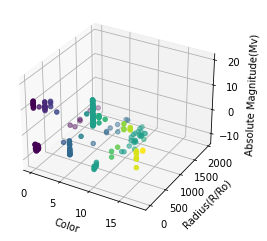

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['Star color'], data['Radius(R/Ro)'], data['Absolute magnitude(Mv)'], c=data['Star color'], marker='o')

ax.set_xlabel('Color')
ax.set_ylabel('Radius(R/Ro)')
ax.set_zlabel('Absolute Magnitude(Mv)')

plt.show()

#### Graphing against spectral class

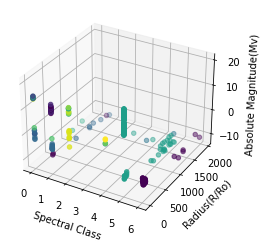

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['Spectral Class'], data['Radius(R/Ro)'], data['Absolute magnitude(Mv)'], c=data['Star color'], marker='o')

ax.set_xlabel('Spectral Class')
ax.set_ylabel('Radius(R/Ro)')
ax.set_zlabel('Absolute Magnitude(Mv)')

plt.show()


#### Graphing against temperture

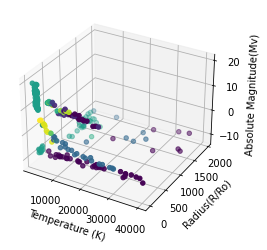

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['Temperature (K)'], data['Radius(R/Ro)'], data['Absolute magnitude(Mv)'], c=data['Star color'], marker='o')

ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Radius(R/Ro)')
ax.set_zlabel('Absolute Magnitude(Mv)')

plt.show()

### Now train, test, and evaluate


In [28]:
# Train the model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Test the model
y_pred = knn.predict(X_test)

# Evaluate the model
score = knn.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.7708333333333334


### Ok so..

What does this mean? Well if we look back, we see that I am testing against spectral class. Spectral classes are discrete values, meaning they behave as steps and/or levels  
rather than slopes or gradients. So as we can see, by using 1 neighbor, we have a fairly decent (for this case) accuracy of 77%.  


K-neighbors may not actually be the ideal algorithm for testing spectral classes, so let us look at a different feature.

In [29]:
X = data.drop(['Temperature (K)'], axis='columns')
y = data['Temperature (K)']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Test the model
y_pred = knn.predict(X_test)

# Evaluate the model
score = knn.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.0


### What?

0% accuracy. What exactly is going on here. What this is telling me is that the data is inaccessible without temperature, as if temperature is the most salient feature.  
I wonder if that is the case. Let us try a new feature.

In [31]:
X = data.drop(['Absolute magnitude(Mv)'], axis='columns')
y = data['Absolute magnitude(Mv)']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [32]:
# Train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Test the model
y_pred = knn.predict(X_test)

# Evaluate the model
score = knn.score(X_test, y_test)
print("Accuracy:", score)

ValueError: Unknown label type: 'continuous'

### I see
The data is continuous. It appears that base knn is more suited for classification than regression. So what do we do? Well of course, KNR, KNNs older and cooler brother.

In [33]:
from sklearn.neighbors import KNeighborsRegressor
# Train the model
knr = KNeighborsRegressor(n_neighbors=17)
knr.fit(X_train, y_train)

# Test the model
y_pred = knr.predict(X_test)

# Evaluate the model
score = knr.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.8794034361057438


### Now
We have explored our neighboring stars and seen how the k-neighbors algorithm can help us traverse our data set. Let's press on, and see what else we can learn.

## Who's the Hottest Star?

It can be daunting looking at a new data set for the first time.  
But thankfully rather than getting lost, the forest can help you find your way.   
Random forests in machine learning is a method with which one can discover salient features within the dataset, in other words, what feature has the greatest effect on another feature.  
It does so by spawning decision trees and traversing different features and recording their "outcomes" at the leaf nodes.   
It ranks the occurrences of each traversal with the outcome and determines from that the saliency of features.

https://builtin.com/data-science/random-forest-algorithm

In [34]:

# importing libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# loading data
df = pd.read_csv('data/6class.csv')


### As previously mentioned

We have to take care of string data, because the machine learning algorithms are allergic. 

In [35]:

# Encoding string columns
le = LabelEncoder()
df['Star color'] = le.fit_transform(df['Star color'])
df['Spectral Class'] = le.fit_transform(df['Spectral Class'])


### For this experiment

We will be judging a star by its color, to tell if it is Hot or Not. In other words, we will be running a Random Forest Classifier to determine the salience of each feature in determining a star's color.

Temperature (K) : 0.30311045924691504
Luminosity(L/Lo) : 0.15382759275535335
Radius(R/Ro) : 0.10960999576549249
Absolute magnitude(Mv) : 0.11047568775637619
Star type : 0.09795726399720774
Spectral Class : 0.2250190004786552


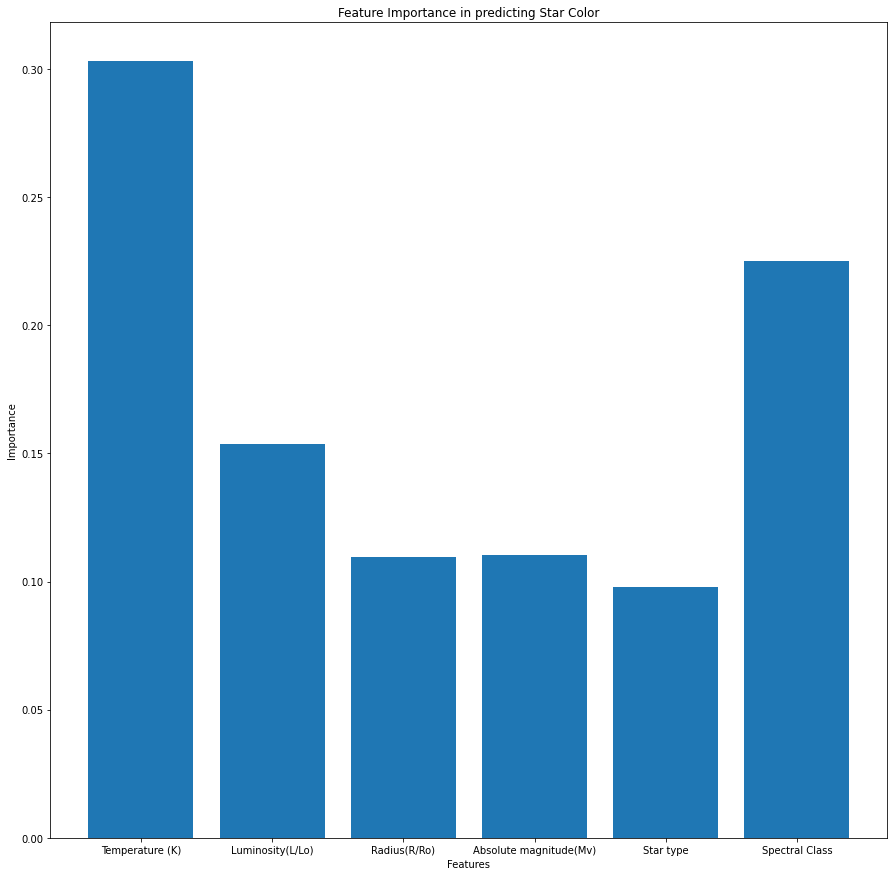

In [38]:

# defining the target and feature data
X = df.drop('Star color', axis=1)
y = df['Star color']

# training the model
model = RandomForestClassifier()
model.fit(X, y)

# checking the feature importance scores
feature_importance = model.feature_importances_

# printing the most important features
for i in range(len(X.columns)):
    print(X.columns[i], ':', feature_importance[i])

# visualize

plt.bar(X.columns, feature_importance)
plt.title('Feature Importance in predicting Star Color')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.rcParams['figure.figsize'] = [15,15]

plt.show()



## As we can see
It appears that a star's temperature is of decisive importance in deciding its color. What an intriguing way to view the data! Let us press forward...

## Star Shopping

Using what I have experimented with within the data and what I have discovered through my resources, I wonder if it is possible to predict the likelihood of a Goldilock Star  
within a given data-set.  


This resource provided me with reliable information on what to look for: https://iopscience.iop.org/article/10.3847/2041-8213/ab0651/meta

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [16]:
df = pd.read_csv('data/6class.csv')

### Data Preprocessing

In [43]:
le = LabelEncoder()
df['Star color'] = le.fit_transform(df['Star color'])
df['Spectral Class'] = le.fit_transform(df['Spectral Class'])

### Splitting Train Test

In [44]:
#goldilock stars are K class
X = df.drop('Spectral Class', axis=1)
y = df['Spectral Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, )

### Building the model (Logical Regression)

In [45]:
clf = LogisticRegression(solver="liblinear", max_iter=100, verbose=True)
clf.fit(X_train, y_train)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=True)

### Predictions and Evaluations

In [60]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

# Printing the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.875
Precision: 0.797183794466403
Recall: 0.875
F1-score: 0.9279673814557535


#### Boosting Accuracy using Grid Search Optimization and Random Forest feature identifiers

---

I like these results but it could be better. Finding a new habitable star depends on it, so we can not be sloppy.  
Idea adapted from: https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5


In [73]:
# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-3, 3, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(3,100,4)),
    'classifier__max_features' : list(range(3,9,1))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 190 candidates, totalling 950 fits


In [74]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Printing the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9375
Precision: 0.845959595959596
Recall: 0.8055555555555557
F1-score: 0.792063492063492



Now THIS is epic. I boosted the accuracy, and we are well on our way to finding a new home! With more research and tweaking, I am certain that this could be pushed to near 100%

### **Further Study**:  
- What other methods can be used to increase accuracy?  
- Are there any other features that could be utilized?  
- How can I make the model more robust?

## # Resources  
 
https://iopscience.iop.org/article/10.3847/2041-8213/ab0651/meta  
https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5